### Use the results of the integration to perform an analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import pandas as pd

In [4]:
ds_path = 'D:/GitHub/sample_workflow/integrate_datasets/integration_DeZuani2024_Miller2023.h5ad'
adata = sc.read_h5ad(ds_path)

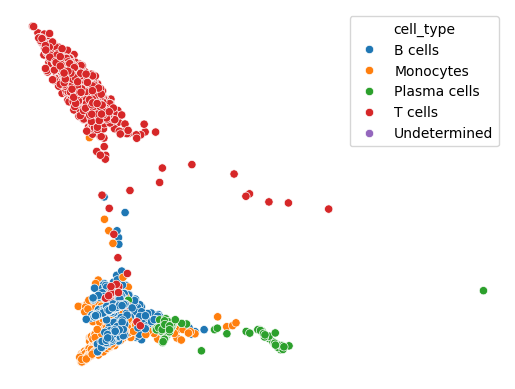

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
vals = adata.obsm['X_umap']
df = pd.DataFrame(vals)
df.columns = ['UMAP_x', 'UMAP_y']
df['cell_type'] = adata.obs['cell_type'].values
df2 = df.copy()
df = df[df['cell_type']!='Undetermined']
ax = sns.scatterplot(df, x='UMAP_x', y='UMAP_y', hue='cell_type')
ax.axis('off')
plt.show()

In [68]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    # Note: DMXL2 should be negative
    "cDC2": ["CST3", "COTL1", "LYZ", "DMXL2", "CLEC10A", "FCER1A"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    # Note HBM and GYPA are negative markers
    "Proerythroblast": ["CDK6", "SYNGR1", "HBM", "GYPA"],
    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    # Note IGHD and IGHM are negative markers
    "B cells": [
        "MS4A1",
        "ITGB1",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
    ],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    # Note PAX5 is a negative marker
    "Plasmablast": ["XBP1", "PRDM1", "PAX5"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}
celltypes = list(marker_genes.keys())
genes = list(marker_genes.values())
mod_adata = adata.T[adata.var_names.isin([item for sublist in genes for item in sublist])]
df_add = pd.DataFrame(mod_adata.layers['normalized']).T
df_add.columns = mod_adata.obs_names.values

In [69]:
df2 = pd.concat([df2, df_add], axis=1)
df2.to_csv('integration_DeZuani2024_Miller2023.csv', index=None)

In [70]:
df2

,UMAP_x,UMAP_y,cell_type,FCRL1,FCER1A,FCER1G,FCGR3A,CD247,ID2,BCL11A,...,PLCG2,COTL1,CLEC10A,CCL5,CCR7,TCF4,CST3,TYROBP,NKG7,XBP1
0,0.225999,1.957476,Monocytes,0.030805,0.744272,106.144211,36.414211,0.117496,17.508942,0.891972,...,5.815327,99.978249,0.403951,0.700400,0.072266,1.080083,155.129288,116.822739,3.772114,5.054910
1,0.160592,1.673642,Monocytes,0.043214,0.378252,142.051743,124.405716,0.162631,28.163788,1.122729,...,3.171087,129.765823,0.121997,0.471205,0.069159,0.833628,191.789230,129.169769,3.280900,3.540938
2,0.205999,1.916470,Monocytes,0.030507,0.631499,120.107002,89.980011,0.127685,22.408970,1.009453,...,4.300924,122.566681,0.373166,0.537666,0.071021,0.940049,212.913116,122.119995,4.911004,4.297675
3,0.169254,1.737226,Monocytes,0.041664,0.428417,139.321533,126.768677,0.161515,28.309814,1.123001,...,3.522682,134.785721,0.138096,0.487904,0.070400,0.856358,202.395020,128.777222,3.634780,3.400453
4,0.173793,1.676824,Monocytes,0.028867,0.379485,153.987457,102.934372,0.114461,24.742609,0.980335,...,2.582484,125.305588,0.205794,0.377969,0.058546,0.711364,213.901154,143.657410,3.397487,3.824155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,4.002034,3.955382,Undetermined,0.022459,0.250706,0.273078,0.173461,0.129348,8.070482,0.054901,...,3.114516,5.318409,0.028642,0.990153,0.245149,50.472157,42.037914,0.311459,0.049270,3.091977
12011,4.560244,4.010930,Undetermined,0.026730,0.302033,0.294915,0.192516,0.144698,8.506547,0.084153,...,3.101273,4.759307,0.033841,1.177833,0.232856,53.260479,39.435135,0.364002,0.058224,2.850696
12012,6.119327,4.512708,Undetermined,0.008077,0.107167,0.438333,0.117744,0.224863,5.946086,0.011425,...,7.008368,5.328022,0.021710,2.593770,0.187221,78.923553,40.777088,0.419707,0.057637,2.515947
12013,0.453501,1.029877,Undetermined,0.047078,0.506684,0.560554,0.081686,0.197683,5.670866,3.114925,...,0.751655,0.387141,0.020635,0.639336,0.491664,9.619913,25.381039,0.373427,0.034582,18.060282
